### Reinforcement learning
Reinforcement learning (RL) is a type of machine learning where an agent learns how to behave in an environment by iteratively performing actions and receiving feedback in the form of rewards or penalties. The goal for the agent
is to maximize the cumulative reward over time by learning the optimal actions to take in different situations. The way of formalizing sequential decision-making and structuring problems that are solved with reinforcement learning  is based on Markov Decision Processes (MDP). The key components of MDP, and therefore of RL, are:
- Agent - The decision-maker that interacts with the environment.
- Environment - The external system with which the agent interacts, providing feedback in the form of states
and rewards.
- State (s) - A representation of the environment at a particular time, which contains all the information the
agent needs to make decisions.
- Action (a) - The decision or move made by the agent that affects the environment.
- Reward (r) - The feedback given to the agent after taking an action, used to guide the learning process.

In every time step t, an agent observes the environment through its current state (st ∈S) and chooses and performs one action from the set of all possible actions (at ∈A). That action changes the current state of the environment and the agent receives feedback for its action (reward or penalty) (rt ∈R). The process repeats over and over again allowing the agent to explore the environment, and based on the feedback it gains, to learn an optimal behavior (policy) for solving the exact problem.

Through the exploration process agent aims to choose actions that not only maximize the immediate reward but the cumulative reward from the future steps as well. The expected cumulative reward for now can be understood simply as the sum of all future rewards starting from the current state, and it is called the expected return, Gt (Gt = rt+1 + γGt+1).

#### Value function
There are two types of value functions:
- State-Value function, Vπ(s) - A function that estimates the expected cumulative reward an agent can obtain from a given state. In other words, it tells us how good any given state is for an agent following a specific policy.
- Action-Value Function (Q function), Qπ(s,a) - A function that estimates the expected cumulative reward an agent can obtain from a given state if it chooses a specific action. In other words, it tells us how good it is for an agent to take any given action from a given state while following a specific policy.

The episode refers to a single, complete sequence of interactions between the agent and the environment, starting from an initial state and ending when a predefined terminal state or condition is met. For example, if an agent learns how to play a specific game, an episode would be a set of iterations that the agent goes through between the start of the game until the end (until the game is terminated by winning or losing).

### Frozen Lake (Gymnasium) Environment

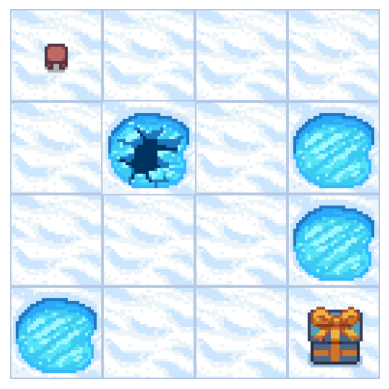

In [12]:
!pip install gymnasium
import gymnasium as gym
from IPython import display
import matplotlib.pyplot as plt
from time import sleep
from random import randint
%matplotlib inline

def show_frame(frame):
  """ Function for rendering the environment frames """
  plt.imshow(frame)
  plt.axis("off")
  plt.show()

# Initialize the Frozen Lake v1 environment
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

env.reset()
frame = env.render()
show_frame(frame)
sleep(1)
display.clear_output(wait=True)

for i in range(10):
  new_obs, reward, done, _, _ = env.step(randint(0, 3))
  frame = env.render()
  show_frame(frame)
  sleep(1)
  display.clear_output(wait=True)



### Parameters initialization
A maximum number of episodes defines a number of games that the agent will play during the training process, with a maximum number of steps until the episode terminates regardless of the outcome. Learning rate (α) defines how
significant the new Q-value is compared to the existing one, while discount rate (γ) is used to weigh less more distant rewards. The exploration rate is used to determine the probability of taking a random action during the training. As the training process proceeds, the exploration rate will decrease, forcing the agent to take actions based on experience rather than random actions once the certain knowledge is gained, which is controlled by the exploration decay rate.

In [13]:
num_episodes = 10000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001
rewards_all_episodes = []

### Q-Table
This time we are initializing the environment using render_mode="ansi" to disable visualization and speed up
the training process. Now we have a 16x4 matrix with all zeros, and these entries will be updated during the training.

In [14]:
import numpy as np

env = gym.make("FrozenLake-v1", render_mode="ansi", is_slippery=False)
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
print(f"Action space size: {action_space_size}")
print(f"State space size: {state_space_size}")
q_table = np.zeros((state_space_size, action_space_size))
print()
print(q_table)

Action space size: 4
State space size: 16

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### The main loop of the algorithm
The main loop of the algorithm is presented in the following code snippet. It is consisted of two loops, one on the single episode level, and the other one for a single step within one episode. At the beginning of each episode, the
environment resets (by using env.reset function) and control variables (such as done) are set to default values.
Further, based on the exploration rate threshold, an agent chooses its next action (randomly or using a gained experience), performs it and collects information about the new state of the environment (function env.step). Further, the Q-table is updated based on a new experience and agents transitions into the new state. The done variable can be used to check if the current episode is terminated or not. After the single step is over, the exploration rate is modified for the next step by using the exploration rate decay function. Rewards for separate episodes are stored into a variable called rewards_all_episodes, which is at the end of the code snippet used to print the statistical results per 1000 episodes.

In [22]:
import random
import numpy as np

# Q-learning algorithm
for episode in range(num_episodes):
  # print(f"Episode {episode}")
  # Initialize new episode params
  state = env.reset()[0]
  done = False
  rewards_current_episode = 0

  for step in range(max_steps_per_episode):
    # Exploration-exploitation trade-off
    exploration_rate_threshold = random.uniform(0, 1)
    if exploration_rate_threshold > exploration_rate:
      action = np.argmax(q_table[state, :])
    else:
      action = env.action_space.sample()

    # Take new action
    new_state, reward, done, truncated, info = env.step(action)

    # Update Q-table
    # INSERT YOUR CODE HERE, BASED ON EQUATION (3)
    # Define hyperparameters
    alpha = 0.1  # Learning rate
    gamma = 0.9  # Discount factor
    zmin = 0.1   # Minimum exploration rate
    zmax = 1.0   # Maximum exploration rate
    decay_rate = 0.001  # Decay rate for exploration rate

    q_table[state, action] = (1 - learning_rate) * q_table[state, action] + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

    # Set new state
    state = new_state

    # Add new reward
    rewards_current_episode += reward
    if done == True:
      break

  # Exploration rate decay
  # INSERT YOUR CODE HERE, BASED ON EQUATION (4)
  # Update Q-table (Q(s, a) update rule)
  # Exploration rate decay
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

  # Add current episode reward to total rewards list
  rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),\
num_episodes/1000)
count = 1000

print("\n********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
  print(count, ": ", str(sum(r/1000)))
  count += 1000


********Average reward per thousand episodes********

1000 :  0.05300000000000004
2000 :  0.05200000000000004
3000 :  0.8670000000000007
4000 :  3.4359999999997326
5000 :  3.5459999999997205
6000 :  2.8459999999997976
7000 :  3.9249999999996787
8000 :  2.977999999999783
9000 :  3.8099999999996914
10000 :  3.958999999999675


### Plotting the training results
The Q-table can be printed and for every state (row of the matrix) the most probable action should have the highest value.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def qtable_directions_map(qtable, map_size=4):
  """Get the best learned action & map it to arrows."""
  qtable_val_max = qtable.max(axis=1).reshape(map_size, map_size)
  qtable_best_action = np.argmax(qtable, axis=1).reshape(map_size, map_size)
  directions = {0: "↑", 1: "↓", 2: "←", 3: "→"}
  qtable_directions = np.empty(qtable_best_action.flatten().shape, dtype=str)
  eps = np.finfo(float).eps
  for idx, val in enumerate(qtable_best_action.flatten()):
    if qtable_val_max.flatten()[idx] > eps:
      qtable_directions[idx] = directions[val]
  qtable_directions = qtable_directions.reshape(map_size, map_size)
  return qtable_val_max, qtable_directions


def plot_q_values_map(qtable, map_size=4):
  """Plot the last frame of the simulation and the policy learned."""
  qtable_val_max, qtable_directions = qtable_directions_map(qtable, map_size)
  # Plot the last frame
  fig, ax = plt.subplots(nrows=1, ncols=1)
  # Plot the policy
  sns.heatmap(
  qtable_val_max,
  annot=qtable_directions,
  fmt="",
  ax=ax,
  cmap=sns.color_palette("Blues", as_cmap=True),
  linewidths=0.7,
  linecolor="black",
  xticklabels=[],
  yticklabels=[],
  # annot_kws={"fontsize": "xx-large"},
  annot_kws={"fontsize": 20, "fontweight": "bold"}
  ).set(title="Learned Q-values\nArrows represent best action")
  for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(0.7)
    spine.set_color("black")
  plt.show()

plot_q_values_map(q_table)

### Testing the results
After the training process is done and Q-table is successfully estimated, we can test the agent’s abilities to navigate through the Frozen Lake environment by choosing the best possible action for every state.

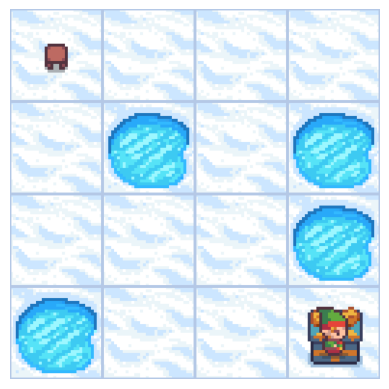

****You reached the goal!****


In [27]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)
print("*****EPISODE ", episode + 1, "*****\n\n\n\n")
for episode in range(3):
  # Initialize new episode params
  state = env.reset()[0]
  done = False
  sleep(1)

  for step in range(max_steps_per_episode):
    # Show current state of environment on screen
    frame = env.render()
    show_frame(frame)
    sleep(0.5)

    display.clear_output(wait=True)
    # Choose action with highest Q-value for current state
    action = np.argmax(q_table[state, :])
    # Take new action
    new_state, reward, done, truncated, info = env.step(action)
    if done:
      frame = env.render()
      show_frame(frame)
      sleep(0.5)
      if reward == 1:
        print("****You reached the goal!****")
        sleep(3)
      else:
        print("****You fell through a hole!****")
        sleep(3)
      break
    # Set new state
    state = new_state
env.close()